#### Candidate ID : C1195415

In [1]:
# Hiding code for simplicity
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

Source: https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer

Importing packages required ...

In [2]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score,precision_score
from sklearn.utils import resample
import itertools

/home/shreyas/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Part 1

Reading data from text file which is in the json format

In [3]:
with open('transactions.txt') as file:
    status = []
    for line in file:
        status.append(json.loads(line))

Data is stored in a list where every element corresponds to the single transaction. Lets have a look at one of the transaction which is in the json format

In [4]:
status[0]

{'accountNumber': '733493772',
 'accountOpenDate': '2014-08-03',
 'acqCountry': 'US',
 'availableMoney': 5000.0,
 'cardCVV': '492',
 'cardLast4Digits': '9184',
 'cardPresent': False,
 'creditLimit': 5000.0,
 'currentBalance': 0.0,
 'currentExpDate': '04/2020',
 'customerId': '733493772',
 'dateOfLastAddressChange': '2014-08-03',
 'echoBuffer': '',
 'enteredCVV': '492',
 'expirationDateKeyInMatch': False,
 'isFraud': True,
 'merchantCategoryCode': 'rideshare',
 'merchantCity': '',
 'merchantCountryCode': 'US',
 'merchantName': 'Lyft',
 'merchantState': '',
 'merchantZip': '',
 'posConditionCode': '01',
 'posEntryMode': '05',
 'posOnPremises': '',
 'recurringAuthInd': '',
 'transactionAmount': 111.33,
 'transactionDateTime': '2016-01-08T19:04:50',
 'transactionType': 'PURCHASE'}

Now storing the list of dictionaries in the pandas dataframe

In [5]:
transaction=pd.DataFrame(status)

In [6]:
transaction.shape

(641914, 29)

In [7]:
len(transaction)

641914

There are 641914 number of transactions in the data

In [8]:
len(transaction.columns)

29

And 29 features

In [9]:
transaction.columns

Index(['accountNumber', 'accountOpenDate', 'acqCountry', 'availableMoney',
       'cardCVV', 'cardLast4Digits', 'cardPresent', 'creditLimit',
       'currentBalance', 'currentExpDate', 'customerId',
       'dateOfLastAddressChange', 'echoBuffer', 'enteredCVV',
       'expirationDateKeyInMatch', 'isFraud', 'merchantCategoryCode',
       'merchantCity', 'merchantCountryCode', 'merchantName', 'merchantState',
       'merchantZip', 'posConditionCode', 'posEntryMode', 'posOnPremises',
       'recurringAuthInd', 'transactionAmount', 'transactionDateTime',
       'transactionType'],
      dtype='object')

These are all the information we have for every transaction

Lets have a look at the dataframe which has the transactions. Before that lets change max number of columns to display all the columns present in the dataframe.

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
transaction.head()

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,customerId,dateOfLastAddressChange,echoBuffer,enteredCVV,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCity,merchantCountryCode,merchantName,merchantState,merchantZip,posConditionCode,posEntryMode,posOnPremises,recurringAuthInd,transactionAmount,transactionDateTime,transactionType
0,733493772,2014-08-03,US,5000.00,492,9184,False,5000.0,0.00,04/2020,733493772,2014-08-03,,492,False,True,rideshare,,US,Lyft,,,01,05,,,111.33,2016-01-08T19:04:50,PURCHASE
1,733493772,2014-08-03,US,4888.67,492,9184,False,5000.0,111.33,06/2023,733493772,2014-08-03,,492,False,False,rideshare,,US,Uber,,,01,09,,,24.75,2016-01-09T22:32:39,PURCHASE
2,733493772,2014-08-03,US,4863.92,492,9184,False,5000.0,136.08,12/2027,733493772,2014-08-03,,492,False,False,rideshare,,US,Lyft,,,01,05,,,187.40,2016-01-11T13:36:55,PURCHASE
3,733493772,2014-08-03,US,4676.52,492,9184,False,5000.0,323.48,09/2029,733493772,2014-08-03,,492,False,True,rideshare,,US,Lyft,,,01,02,,,227.34,2016-01-11T22:47:46,PURCHASE
4,733493772,2014-08-03,US,4449.18,492,9184,False,5000.0,550.82,10/2024,733493772,2014-08-03,,492,False,False,rideshare,,US,Lyft,,,01,02,,,0.00,2016-01-16T01:41:11,ADDRESS_VERIFICATION


Lets have a look at number of values which are not present

In [12]:
transaction.isnull().sum(axis=0)

accountNumber               0
accountOpenDate             0
acqCountry                  0
availableMoney              0
cardCVV                     0
cardLast4Digits             0
cardPresent                 0
creditLimit                 0
currentBalance              0
currentExpDate              0
customerId                  0
dateOfLastAddressChange     0
echoBuffer                  0
enteredCVV                  0
expirationDateKeyInMatch    0
isFraud                     0
merchantCategoryCode        0
merchantCity                0
merchantCountryCode         0
merchantName                0
merchantState               0
merchantZip                 0
posConditionCode            0
posEntryMode                0
posOnPremises               0
recurringAuthInd            0
transactionAmount           0
transactionDateTime         0
transactionType             0
dtype: int64

Above results show that no column has the missing values. However when we had displayed 5 rows in the dataframe, we could see that some of the columns like merchantZip dont have any value.
The missing values dont have any datatype and lets replace it by NaN (Not a number which denotes missing value)

In [13]:
transaction=(transaction.replace(r'^\s*$', np.nan, regex=True))

In [14]:
transaction.isnull().sum(axis=0)

accountNumber                    0
accountOpenDate                  0
acqCountry                    3913
availableMoney                   0
cardCVV                          0
cardLast4Digits                  0
cardPresent                      0
creditLimit                      0
currentBalance                   0
currentExpDate                   0
customerId                       0
dateOfLastAddressChange          0
echoBuffer                  641914
enteredCVV                       0
expirationDateKeyInMatch         0
isFraud                          0
merchantCategoryCode             0
merchantCity                641914
merchantCountryCode            624
merchantName                     0
merchantState               641914
merchantZip                 641914
posConditionCode               287
posEntryMode                  3345
posOnPremises               641914
recurringAuthInd            641914
transactionAmount                0
transactionDateTime              0
transactionType     

Now we can see that some of the columns have missing values. Lets deal with them

Some columns have same number of missing values as that of the number of rows (641914). We cant impute those values and lets entirely remove these columns

In [15]:
transaction=transaction.drop(['merchantCity','echoBuffer','merchantState','merchantZip','posOnPremises','recurringAuthInd'],axis=1)

Lets deal with other columns having missing values

#### 1) acqCountry

In [16]:
transaction['acqCountry'].value_counts()/len(transaction)

US     0.985028
MEX    0.004091
CAN    0.002913
PR     0.001873
Name: acqCountry, dtype: float64

Almost 99% of the values in the column has value 'US'. The number of missing values are 3193 which is greater than other values. In this case we cant even replace the values by mean as it is a categorical variable. Now, lets fill the missing values with the element having maximum frequency which is 'US'. We can also use some method like linear regression to predict the values in this case but the category having maximum frequency is dominating the column by large margin and so it would have become unbalanced dataset which would have resulted in 'US' only in most of the cases. So we replaced it with the maximum frequency element.

In [17]:
transaction['acqCountry']= transaction['acqCountry'].fillna(transaction['acqCountry'].value_counts().idxmax())


#### 2) Transaction Type:

In [18]:
transaction['transactionType'].value_counts()

PURCHASE                608685
ADDRESS_VERIFICATION     16478
REVERSAL                 16162
Name: transactionType, dtype: int64

In [19]:
transaction['transactionType']= transaction['transactionType'].fillna(transaction['transactionType'].value_counts().idxmax())

#### 3) Merchant country code

In [20]:
transaction['merchantCountryCode'].value_counts()

US     635577
MEX      2636
CAN      1874
PR       1203
Name: merchantCountryCode, dtype: int64

In [21]:
transaction['merchantCountryCode']= transaction['merchantCountryCode'].fillna(transaction['merchantCountryCode'].value_counts().idxmax())


#### 4) posConditionCode

In [22]:
transaction['posConditionCode'].value_counts()

01    514144
08    121507
99      5976
Name: posConditionCode, dtype: int64

In [23]:
transaction['posConditionCode']= transaction['posConditionCode'].fillna(transaction['posConditionCode'].value_counts().idxmax())

The same logic can be applied for all of the above columns. The number of missing values are too less and the maximum frequency element is highy dominant in the columns which lead us to replace missing values by the maximum element only.

#### 5) posEntryMode

In [24]:
transaction['posEntryMode'].value_counts()

05    255615
09    193193
02    160589
90     16251
80     12921
Name: posEntryMode, dtype: int64

In [25]:
transaction['posEntryMode']= transaction['posEntryMode'].fillna('00')

In this case, all the categories have almost equal of comparable distribution. So, we cant directly replace it with maximum element. However we can apply multi-class classification to predict the category which will be computationally heavy task for 0.5% of rows for a single column. Also this method doesnt guarantee the correct imputation. So, the simplest thing we can do is we can create another category for the missing values.

No method guarantees the perfect imputation as it is the complete unsupervised method. We are not aware of the results and can be completely random. Also its not even worth to invest large amount of time and resources to impute very small fraction of values. 

In [26]:
transaction.isnull().sum(axis=0)

accountNumber               0
accountOpenDate             0
acqCountry                  0
availableMoney              0
cardCVV                     0
cardLast4Digits             0
cardPresent                 0
creditLimit                 0
currentBalance              0
currentExpDate              0
customerId                  0
dateOfLastAddressChange     0
enteredCVV                  0
expirationDateKeyInMatch    0
isFraud                     0
merchantCategoryCode        0
merchantCountryCode         0
merchantName                0
posConditionCode            0
posEntryMode                0
transactionAmount           0
transactionDateTime         0
transactionType             0
dtype: int64

Now number of missing values are 0 in every column and we have successfully imputed the missing values.

In [27]:
transaction.dtypes

accountNumber                object
accountOpenDate              object
acqCountry                   object
availableMoney              float64
cardCVV                      object
cardLast4Digits              object
cardPresent                    bool
creditLimit                 float64
currentBalance              float64
currentExpDate               object
customerId                   object
dateOfLastAddressChange      object
enteredCVV                   object
expirationDateKeyInMatch       bool
isFraud                        bool
merchantCategoryCode         object
merchantCountryCode          object
merchantName                 object
posConditionCode             object
posEntryMode                 object
transactionAmount           float64
transactionDateTime          object
transactionType              object
dtype: object

After having look at the the columns, I realized that some of the columns which are in the numeric format have data types object. Also the columns which contain dates are in the object format. Lets, change the datatypes of these columns

In [28]:
transaction.head(3)

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,customerId,dateOfLastAddressChange,enteredCVV,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionDateTime,transactionType
0,733493772,2014-08-03,US,5000.00,492,9184,False,5000.0,0.00,04/2020,733493772,2014-08-03,492,False,True,rideshare,US,Lyft,01,05,111.33,2016-01-08T19:04:50,PURCHASE
1,733493772,2014-08-03,US,4888.67,492,9184,False,5000.0,111.33,06/2023,733493772,2014-08-03,492,False,False,rideshare,US,Uber,01,09,24.75,2016-01-09T22:32:39,PURCHASE
2,733493772,2014-08-03,US,4863.92,492,9184,False,5000.0,136.08,12/2027,733493772,2014-08-03,492,False,False,rideshare,US,Lyft,01,05,187.40,2016-01-11T13:36:55,PURCHASE


Converting numeric columns to Int

In [29]:
transaction['accountNumber']=transaction['accountNumber'].astype(str).astype(int)

In [30]:
transaction['cardCVV']=transaction['cardCVV'].astype(str).astype(int)

In [31]:
transaction['cardLast4Digits']=transaction['cardLast4Digits'].astype(str).astype(int)

In [32]:
transaction['enteredCVV']=transaction['enteredCVV'].astype(str).astype(int)

Converting columns having dates to type datatime

In [33]:
transaction['transactionDateTime'] =  pd.to_datetime(transaction['transactionDateTime'])

In [34]:
transaction['accountOpenDate'] =  pd.to_datetime(transaction['accountOpenDate'])

In [35]:
transaction['currentExpDate'] =  pd.to_datetime(transaction['currentExpDate'])

In [36]:
transaction['dateOfLastAddressChange'] =  pd.to_datetime(transaction['dateOfLastAddressChange'])

In [37]:
display(transaction['transactionAmount'].describe())

count    641914.000000
mean        135.162497
std         147.053302
min           0.000000
25%          32.320000
50%          85.800000
75%         189.030000
max        1825.250000
Name: transactionAmount, dtype: float64

In [38]:
display(transaction['creditLimit'].describe())

count    641914.000000
mean      10697.210608
std       11460.359133
min         250.000000
25%        5000.000000
50%        7500.000000
75%       15000.000000
max       50000.000000
Name: creditLimit, dtype: float64

### Part 2

Plotting histogram of transactionAmount column with 100 bins

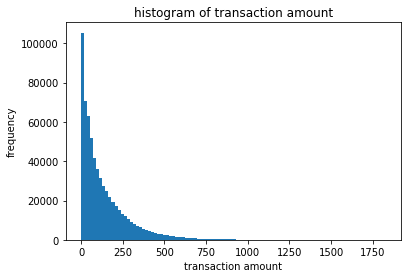

In [39]:
plt.hist(transaction['transactionAmount'],bins=100)
plt.title('histogram of transaction amount')
plt.xlabel('transaction amount')
plt.ylabel('frequency')
plt.show()

The above diagram shows histogram of all the transactions. Y-axis denotes the frequency of the transaction amount and transaction amount increases along the x-axis. We can observe the trend that as amount increases, the number of transactions are exponentially decreasing. So, users are using credit cards for lower amount of transactions more often than the larger amount. Probably the credit limit is putting restriction on the transactions. 

Lets have a look at transaction amount distribution more closely by dividing it in the different ranges.

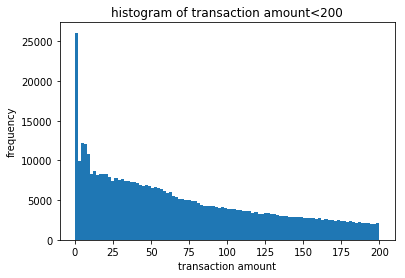

In [40]:
plt.hist(transaction[transaction['transactionAmount']<200]['transactionAmount'],bins=100)
plt.title('histogram of transaction amount<200')
plt.xlabel('transaction amount')
plt.ylabel('frequency')
plt.show()

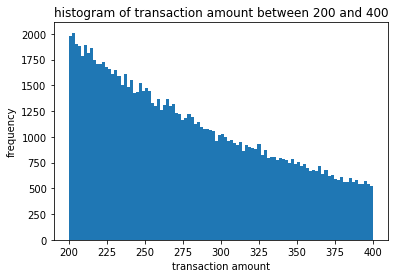

In [41]:
plt.hist(transaction[(transaction['transactionAmount']>=200)&(transaction['transactionAmount']<400)]['transactionAmount'],bins=100)
plt.title('histogram of transaction amount between 200 and 400')
plt.xlabel('transaction amount')
plt.ylabel('frequency')
plt.show()


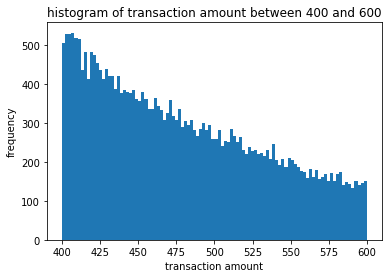

In [42]:
plt.hist(transaction[(transaction['transactionAmount']>=400)&(transaction['transactionAmount']<600)]['transactionAmount'],bins=100)
plt.title('histogram of transaction amount between 400 and 600')
plt.xlabel('transaction amount')
plt.ylabel('frequency')
plt.show()


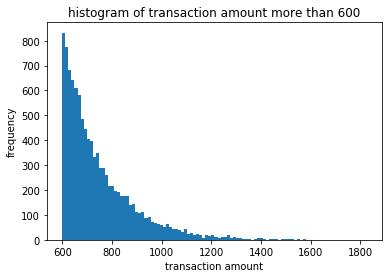

In [43]:
plt.hist(transaction[transaction['transactionAmount']>=600]['transactionAmount'],bins=100)
plt.title('histogram of transaction amount more than 600')
plt.xlabel('transaction amount')
plt.ylabel('frequency')
plt.show()

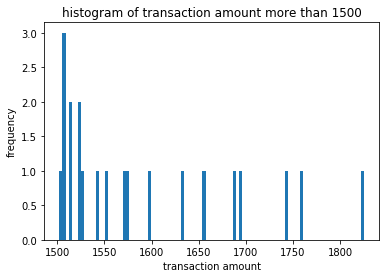

In [44]:
plt.hist(transaction[transaction['transactionAmount']>=1500]['transactionAmount'],bins=100)
plt.title('histogram of transaction amount more than 1500')
plt.xlabel('transaction amount')
plt.ylabel('frequency')
plt.show()

From the above diagrams we can conclude that almost similar trend is observed for all the ranges. As we increase the amount, the frequency also decreases which can be observed from the y-axis range. For the amount more than 1500, there are very rare transactions and clearly indicates that people dont use credit cards for amount more than 1000 very often and most of the transactions are there for amount less than 500. 

In [45]:
transaction['transactionAmount'].mean()

135.16249698556928

In [46]:
catmean=transaction.groupby('merchantCategoryCode')['transactionAmount'].mean()
catmean

merchantCategoryCode
airline                 144.037981
auto                    145.096361
cable/phone              98.513826
entertainment           144.308133
fastfood                144.788891
food                    146.618900
food_delivery            54.891066
fuel                     43.895275
furniture               146.816601
gym                      33.616583
health                  145.059786
hotels                  146.056210
mobileapps                5.777449
online_gifts            143.848380
online_retail           146.292001
online_subscriptions     14.620399
personal care           147.562236
rideshare               145.173633
subscriptions           145.660829
Name: transactionAmount, dtype: float64

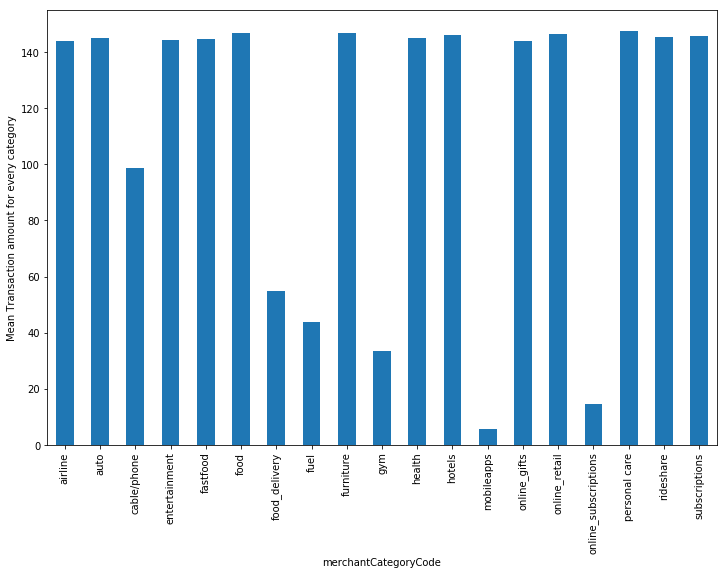

In [47]:
ax = catmean.plot(kind = 'bar',figsize=(12,8))
ax.set_ylabel('Mean Transaction amount for every category')
plt.show()

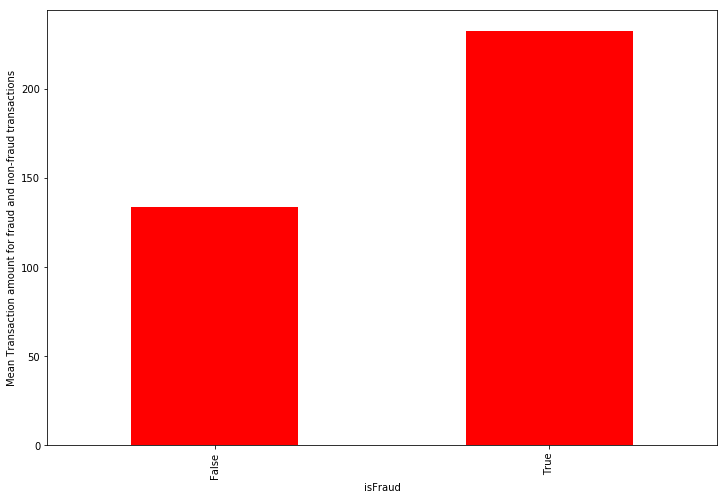

In [48]:
Fmean=transaction.groupby('isFraud')['transactionAmount'].mean()
ax = Fmean.plot(kind = 'bar',figsize=(12,8),color='R')
ax.set_ylabel('Mean Transaction amount for fraud and non-fraud transactions')
plt.show()

Average amount for fraud transactions is around 230-240 and for not fraud transaction is much lesser which is 140. So, it is evident that fraud transactions are happening for higher amount while normal transactions have lesser average. 

In [49]:
Fmean

isFraud
False    133.416128
True     232.603744
Name: transactionAmount, dtype: float64

In [50]:
transaction.groupby('merchantCategoryCode').size()

merchantCategoryCode
airline                   9990
auto                     10147
cable/phone               1490
entertainment            69138
fastfood                101196
food                     68245
food_delivery             4990
fuel                     22566
furniture                 7813
gym                       2874
health                   14344
hotels                   22879
mobileapps               14614
online_gifts             33045
online_retail           161469
online_subscriptions     11247
personal care            16917
rideshare                50574
subscriptions            18376
dtype: int64

In [51]:
(transaction.groupby(['accountNumber'])['creditLimit'].mean()).mean()

10226.5

### Part 3

To observe the patterns of the transactions, lets display more rows.

In [52]:
pd.options.display.max_rows = 200

In [53]:
transaction.head(500)

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,customerId,dateOfLastAddressChange,enteredCVV,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionDateTime,transactionType
0,733493772,2014-08-03,US,5000.00,492,9184,False,5000.0,0.00,2020-04-01,733493772,2014-08-03,492,False,True,rideshare,US,Lyft,01,05,111.33,2016-01-08 19:04:50,PURCHASE
1,733493772,2014-08-03,US,4888.67,492,9184,False,5000.0,111.33,2023-06-01,733493772,2014-08-03,492,False,False,rideshare,US,Uber,01,09,24.75,2016-01-09 22:32:39,PURCHASE
2,733493772,2014-08-03,US,4863.92,492,9184,False,5000.0,136.08,2027-12-01,733493772,2014-08-03,492,False,False,rideshare,US,Lyft,01,05,187.40,2016-01-11 13:36:55,PURCHASE
3,733493772,2014-08-03,US,4676.52,492,9184,False,5000.0,323.48,2029-09-01,733493772,2014-08-03,492,False,True,rideshare,US,Lyft,01,02,227.34,2016-01-11 22:47:46,PURCHASE
4,733493772,2014-08-03,US,4449.18,492,9184,False,5000.0,550.82,2024-10-01,733493772,2014-08-03,492,False,False,rideshare,US,Lyft,01,02,0.00,2016-01-16 01:41:11,ADDRESS_VERIFICATION
5,733493772,2014-08-03,US,4449.18,492,9184,False,5000.0,550.82,2021-02-01,733493772,2014-08-03,492,False,False,online_gifts,US,Fresh eCards,01,05,9.80,2016-01-16 21:35:27,PURCHASE
6,733493772,2014-08-03,US,4439.38,492,9184,False,5000.0,560.62,2026-01-01,733493772,2014-08-03,492,False,False,rideshare,US,Uber,01,05,247.99,2016-01-24 07:54:01,PURCHASE
7,733493772,2014-08-03,US,4191.39,492,9184,False,5000.0,808.61,2031-12-01,733493772,2014-08-03,492,False,False,personal care,US,Universe Massage #95463,01,05,0.00,2016-01-26 05:28:24,ADDRESS_VERIFICATION
8,733493772,2014-08-03,US,4191.39,492,9184,True,5000.0,808.61,2024-04-01,733493772,2014-08-03,492,False,False,personal care,US,Universe Massage #70014,01,05,11.54,2016-01-26 12:18:14,PURCHASE
9,733493772,2014-08-03,US,4179.85,492,9184,True,5000.0,820.15,2024-04-01,733493772,2014-08-03,492,False,False,personal care,US,Universe Massage #70014,01,05,11.54,2016-01-26 12:19:15,REVERSAL


1) Reversal:
Reversal are easier to detect as it is given by transaction type. In case of reversal the amount is credited back to the user account and so available amount increases. There are 16262 reversed transaction.
Here are some observations for reversal transactions:


In [54]:
rev=transaction[transaction['transactionType']=='REVERSAL']

In [55]:
print('Number of reversed transactions:',len(rev))
print('Percentage of reversed transactions: ',len(rev)/len(transaction)*100,'%')

print('Total amount of reversed transactions:',sum(rev['transactionAmount']))
print('Fraction of reversed transactions: ',sum(rev['transactionAmount'])/sum(transaction['transactionAmount']))


Number of reversed transactions: 16162
Percentage of reversed transactions:  2.517782755945501 %
Total amount of reversed transactions: 2242915.099999993
Fraction of reversed transactions:  0.025851144829802112


2) Multi-swipe duplicated transaction: <br>

These kind of transactions happen due to multiple swipe or multiple payment for the same transaction. In this case, the multiple transactions of same amount happen for the same merchant within short period of time. In the problem statement, the short period of time is not clearly defined and I will assume that multi-swipe transaction reflects on the account within 24 hours of the original amount. (By intuition we know that the transaction happens immediately in most of the cases. But, I am taking longer period as system might take more time to verify some of the transactions and I dont want to rule out such possibilities)

In [56]:
transaction['duplicated'] = ((transaction['transactionType']!='REVERSAL')&
                            (transaction['merchantCategoryCode'] == transaction['merchantCategoryCode'].shift(1))&
                            (transaction['merchantName'] == transaction['merchantName'].shift(1)) & 
                            ((transaction['transactionAmount'] == transaction['transactionAmount'].shift(1)) & 
                            (transaction['accountNumber'] == transaction['accountNumber'])) &
    (((transaction['transactionDateTime']-transaction['transactionDateTime'].shift(1))/np.timedelta64(1,'D'))<=1))


This is how the multi-swipe duplicated transactions are detected. The duplicated transaction is the next to its original transaction which happen withing a day. Also, merchant name, amount, are same. Most of the cases are covered by these conditions. It is very well possible that the same item can be purchased from the same merchant on the same day by the same user. But for simplicity I am ignoring this case. If we have to consider this case, we need to reduce the time between these transactions to a minute or an hour. But it can also ignore some system changes. <br>
In case of reversal transactions, same conditions can be satisfied so I am excluding reversal transactions by using first condition.

In [57]:
transaction.head(5)

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,customerId,dateOfLastAddressChange,enteredCVV,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionDateTime,transactionType,duplicated
0,733493772,2014-08-03,US,5000.00,492,9184,False,5000.0,0.00,2020-04-01,733493772,2014-08-03,492,False,True,rideshare,US,Lyft,01,05,111.33,2016-01-08 19:04:50,PURCHASE,False
1,733493772,2014-08-03,US,4888.67,492,9184,False,5000.0,111.33,2023-06-01,733493772,2014-08-03,492,False,False,rideshare,US,Uber,01,09,24.75,2016-01-09 22:32:39,PURCHASE,False
2,733493772,2014-08-03,US,4863.92,492,9184,False,5000.0,136.08,2027-12-01,733493772,2014-08-03,492,False,False,rideshare,US,Lyft,01,05,187.40,2016-01-11 13:36:55,PURCHASE,False
3,733493772,2014-08-03,US,4676.52,492,9184,False,5000.0,323.48,2029-09-01,733493772,2014-08-03,492,False,True,rideshare,US,Lyft,01,02,227.34,2016-01-11 22:47:46,PURCHASE,False
4,733493772,2014-08-03,US,4449.18,492,9184,False,5000.0,550.82,2024-10-01,733493772,2014-08-03,492,False,False,rideshare,US,Lyft,01,02,0.00,2016-01-16 01:41:11,ADDRESS_VERIFICATION,False


In [58]:
dupl=transaction[transaction['duplicated']==True]

In [59]:
dupl

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,customerId,dateOfLastAddressChange,enteredCVV,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionDateTime,transactionType,duplicated
120,733493772,2014-08-03,US,3811.33,492,9184,False,5000.0,1188.67,2020-09-01,733493772,2016-06-26,492,False,False,rideshare,US,Lyft,01,05,103.81,2016-09-08 07:51:27,PURCHASE,True
300,965952336,2013-01-11,US,1807.13,286,4029,False,7500.0,5692.87,2027-10-01,965952336,2016-02-08,286,False,False,online_retail,US,ebay.com,01,05,394.24,2016-03-10 23:06:20,PURCHASE,True
346,965952336,2013-01-11,US,609.35,286,4029,False,7500.0,6890.65,2029-02-01,965952336,2016-02-08,286,False,False,online_retail,US,ebay.com,01,02,20.35,2016-06-11 22:52:55,PURCHASE,True
399,965952336,2013-01-11,US,1242.15,286,4029,True,7500.0,6257.85,2028-05-01,965952336,2016-02-08,286,False,False,hotels,US,Rodeway Inn #700975,01,05,161.08,2016-09-10 02:50:47,PURCHASE,True
431,965952336,2013-01-11,US,3401.57,258,1562,False,7500.0,4098.43,2028-06-01,965952336,2016-02-08,258,False,False,online_retail,US,gap.com,99,02,37.62,2016-11-02 13:45:49,PURCHASE,True
896,885773130,2015-04-09,US,4949.25,612,9852,False,7500.0,2550.75,2027-03-01,885773130,2015-04-09,612,False,False,online_retail,US,oldnavy.com,08,05,77.88,2016-05-28 17:50:14,PURCHASE,True
997,885773130,2015-04-09,US,5687.52,612,9852,True,7500.0,1812.48,2020-03-01,885773130,2016-07-06,612,False,False,food,US,Franks Pub #87366,01,05,50.93,2016-10-18 20:19:16,PURCHASE,True
1071,799731758,2015-10-16,US,49875.23,159,7155,True,50000.0,124.77,2028-07-01,799731758,2015-10-16,159,False,False,food,US,Dinosaur Sandwitch Bar #960325,08,09,124.77,2016-09-01 08:10:36,PURCHASE,True
1230,784469543,2008-08-21,US,1095.64,479,8915,False,2500.0,1404.36,2026-05-01,784469543,2016-04-09,479,False,False,hotels,US,Hyatt House #461673,01,05,271.60,2016-05-11 05:43:42,PURCHASE,True
1290,784469543,2008-08-21,US,1700.09,479,8915,True,2500.0,799.91,2020-12-01,784469543,2016-04-09,479,False,False,hotels,US,Hilton Hotels #89655,01,05,401.06,2016-07-07 16:39:42,PURCHASE,True


In [60]:
print('Number of duplicate multi-swipe transactions:',len(dupl))
print('Percentage of duplicate multi-swipe transactions: ',len(dupl)/len(transaction)*100,'%')

print('Total amount of duplicate multi-swipe transactions:',sum(dupl['transactionAmount']))
print('Fraction of duplicate multi-swipe transactions: ',sum(dupl['transactionAmount'])/sum(transaction['transactionAmount']))


Number of duplicate multi-swipe transactions: 6175
Percentage of duplicate multi-swipe transactions:  0.9619668678358784 %
Total amount of duplicate multi-swipe transactions: 884708.1200000027
Fraction of duplicate multi-swipe transactions:  0.010196871804118704


### Part 4

In this segment, we need to build a model which will successfully detect the fraud transactions. We cant afford to have false negatives in this case. So I will try to build model with high recall. High recall intuitively denotes that the classification model has ability to detect larger extent of positive examples. 

In [61]:
transaction.dtypes

accountNumber                        int64
accountOpenDate             datetime64[ns]
acqCountry                          object
availableMoney                     float64
cardCVV                              int64
cardLast4Digits                      int64
cardPresent                           bool
creditLimit                        float64
currentBalance                     float64
currentExpDate              datetime64[ns]
customerId                          object
dateOfLastAddressChange     datetime64[ns]
enteredCVV                           int64
expirationDateKeyInMatch              bool
isFraud                               bool
merchantCategoryCode                object
merchantCountryCode                 object
merchantName                        object
posConditionCode                    object
posEntryMode                        object
transactionAmount                  float64
transactionDateTime         datetime64[ns]
transactionType                     object
duplicated 

In [62]:
(transaction[transaction['transactionType']=='ADDRESS_VERIFICATION']).groupby('isFraud').size()

isFraud
False    16391
True        87
dtype: int64

In [63]:
(transaction[transaction['transactionType']=='REVERSAL']).groupby('isFraud').size()

isFraud
False    15869
True       293
dtype: int64

#### Integer columns

Finding pearson's correlation coefficient for all the integer variables <br>

Its value ranges from -1 to +1 where, -1 denotes negative correlation between the features and +1 denotes very strong positive correlation. 0 denotes no correlation. We need to select the features which has very high positive and negative correlation coefficient with the ‘isfraud’ variable.

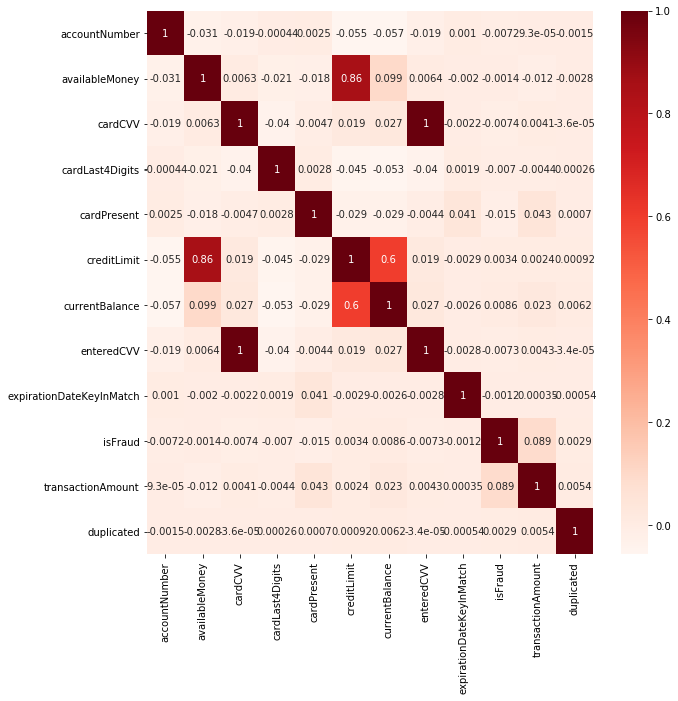

In [64]:
plt.figure(figsize=(10,10))
cor = transaction.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [65]:
cor_target = abs(cor["isFraud"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.008]
relevant_features

cardPresent          0.014946
currentBalance       0.008611
isFraud              1.000000
transactionAmount    0.088708
Name: isFraud, dtype: float64

These are the only features which we can select as only these features have coefficient larger than 0.008. I decided the threshold by observing the values for all the features. We wanted to ignore the insignificant features like accountNumber and CVV which are unique identifies and doesn’t affect transactions by any means.

In [66]:
cor_target[cor_target<0.008]

accountNumber               0.007157
availableMoney              0.001379
cardCVV                     0.007402
cardLast4Digits             0.007010
creditLimit                 0.003357
enteredCVV                  0.007347
expirationDateKeyInMatch    0.001239
duplicated                  0.002946
Name: isFraud, dtype: float64

#### Categorical columns

We can’t find the correlation between categorical and nominal variable  by the same method. (Boolean variables are nominal as these variables are numeric but not continuous, as these variables have levels.)  <br><br>

Cramer’s V test is the best method to find correlation between categorical or nominal variables. It is based on pearson’s chi squared test. Its value is between 0 and 1 where 0 denotes no correlation and 1 denotes high correlation.

https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365

In [67]:
def cramers_corrected_stat(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V <br>
https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix

In [68]:
catCols=['isFraud','acqCountry','merchantCategoryCode','merchantCountryCode','merchantName','transactionType','posEntryMode','posConditionCode']

In [69]:
corrM = np.zeros((len(catCols),len(catCols)))
for col1, col2 in itertools.combinations(catCols, 2):
    idx1, idx2 = catCols.index(col1), catCols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(transaction[col1], transaction[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]


In [70]:
corrCat = pd.DataFrame(corrM, index=catCols, columns=catCols)
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(corrCat, annot=True, ax=ax); 
ax.set_title("Cramer V Correlation between Variables");

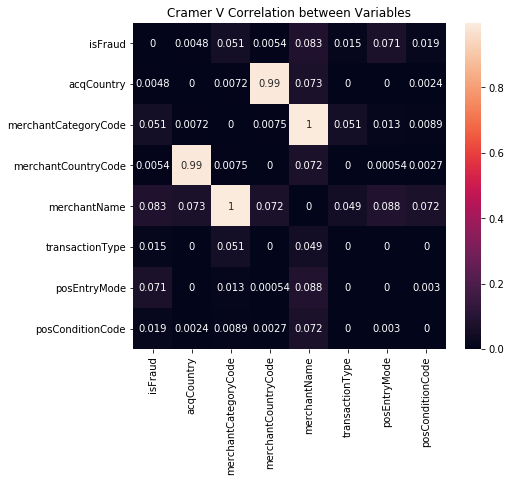

In [71]:
plt.show()

In [72]:
cor_target = (corrCat["isFraud"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.008]
relevant_features

merchantCategoryCode    0.051460
merchantName            0.082775
transactionType         0.015113
posEntryMode            0.070797
posConditionCode        0.019179
Name: isFraud, dtype: float64

We will apply the same threshold which we applied for integer correlations.

In [73]:
#Insignificant features
cor_target[cor_target<0.008]

isFraud                0.000000
acqCountry             0.004810
merchantCountryCode    0.005386
Name: isFraud, dtype: float64

In [74]:
len(transaction['merchantName'].unique())

2493

In [75]:
print('Number of unique categories',len(transaction['merchantCategoryCode'].unique()))
transaction['merchantCategoryCode'].value_counts()

Number of unique categories 19


online_retail           161469
fastfood                101196
entertainment            69138
food                     68245
rideshare                50574
online_gifts             33045
hotels                   22879
fuel                     22566
subscriptions            18376
personal care            16917
mobileapps               14614
health                   14344
online_subscriptions     11247
auto                     10147
airline                   9990
furniture                 7813
food_delivery             4990
gym                       2874
cable/phone               1490
Name: merchantCategoryCode, dtype: int64

 There are multiple methods which we can consider for vectorization. We can have a number for every category. (Ordinal encoding). However, the algorithm will assume that these are the levels. For example, if online_retail =1 and fastfood = 2, the algorithm will assume that fastfood has more weight than online_retails and so on. However, these are independent categories and there isnt significance leveling between these categories. So using ordinal encoding isnt a good idea.

We can use 1-hot encoding. In this case, 19 different columns will be created. Each will have value 0 or 1. where, 1 denotes value present. 


merchant category denotes the class and from the heatmap we can observe that these two features are highly significant. So we can use merchant category only and dropping merchant name wont make significant difference as the same information is used in the other column.

In [76]:
transaction['transactionType'].unique()

array(['PURCHASE', 'ADDRESS_VERIFICATION', 'REVERSAL'], dtype=object)

In [78]:
transaction['posEntryMode'].unique()

array(['05', '09', '02', '90', '00', '80'], dtype=object)

In [ ]:
transaction['posConditionCode'].unique()

With transactionType, posEntryMode and posConditionlCode also, same logic (1-hot encoding) can be used for categorical encoding. 


In [80]:
# Dropping all the columns which are insignificant
data=transaction.drop(['acqCountry','merchantCountryCode','merchantName','accountNumber','availableMoney','cardCVV','cardLast4Digits','creditLimit','enteredCVV','expirationDateKeyInMatch','duplicated','customerId'],axis=1)  

Creating 1-hot encoded columns for the above descibed features

In [81]:
newData=pd.get_dummies(data, columns=['transactionType','merchantCategoryCode','posEntryMode','posConditionCode'], drop_first=False)

#### Date columns

We can segment this feature to get more information like day of , month, year, day of week, hour in the day. So that we get 5 different features.


In [82]:
newData['day_of_trans']=newData['transactionDateTime'].dt.day
newData['month_of_trans']=newData['transactionDateTime'].dt.month
newData['year_of_trans']=newData['transactionDateTime'].dt.year
newData['hour_of_trans']=newData['transactionDateTime'].dt.hour
newData['week_of_trans']=newData['transactionDateTime'].dt.weekday_name

We can get current age of account from this feature by subtracting transactionDate from this feature.

In [83]:
newData['age_of_acnt']=(newData['transactionDateTime']-newData['accountOpenDate'])/ np.timedelta64(1, 'D')

This column denotes the expiration date of the account. We can calculate remaining age of the account at the current time using this feature.

In [84]:
newData['age_rem']=(newData['currentExpDate']-newData['transactionDateTime'])/ np.timedelta64(1, 'D')

In [85]:
newData['addr_change']=(newData['transactionDateTime']-newData['dateOfLastAddressChange'])/ np.timedelta64(1, 'D')

We can again find how long the address was last changed.

In [86]:
newData=newData.drop(['transactionDateTime','currentExpDate','dateOfLastAddressChange','accountOpenDate'],axis=1)

In [87]:
newData=pd.get_dummies(newData, columns=['week_of_trans'], drop_first=False)

In [88]:
newData.dtypes

cardPresent                                     bool
currentBalance                               float64
isFraud                                         bool
transactionAmount                            float64
transactionType_ADDRESS_VERIFICATION           uint8
transactionType_PURCHASE                       uint8
transactionType_REVERSAL                       uint8
merchantCategoryCode_airline                   uint8
merchantCategoryCode_auto                      uint8
merchantCategoryCode_cable/phone               uint8
merchantCategoryCode_entertainment             uint8
merchantCategoryCode_fastfood                  uint8
merchantCategoryCode_food                      uint8
merchantCategoryCode_food_delivery             uint8
merchantCategoryCode_fuel                      uint8
merchantCategoryCode_furniture                 uint8
merchantCategoryCode_gym                       uint8
merchantCategoryCode_health                    uint8
merchantCategoryCode_hotels                   

As this is fraud detection algorithm and odds of having fraud transactions are very less, we have highly unbalanced dataset. 

In [89]:
actCount=newData.groupby('isFraud').size()
actCount/len(newData)*100

isFraud
False    98.239328
True      1.760672
dtype: float64

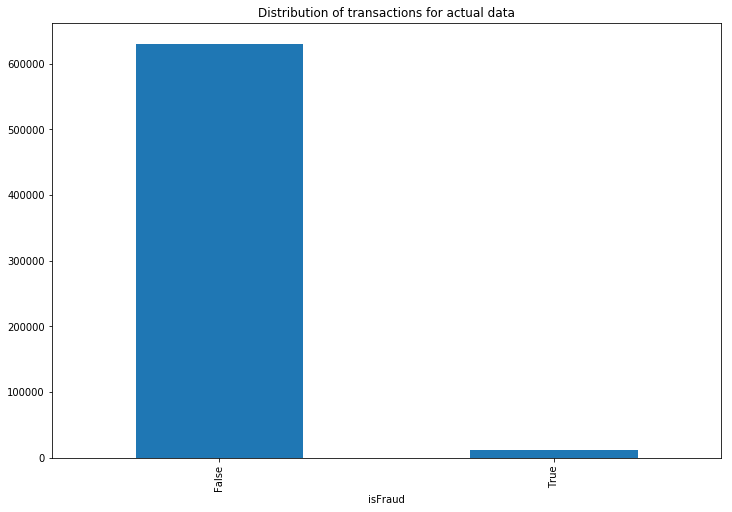

In [90]:
# Bar plot of class distribution
ax = actCount.plot(kind = 'bar',figsize=(12,8),title='Distribution of transactions for actual data')
plt.show()

In [91]:
target=newData['isFraud']
finaldf=newData.drop(['isFraud'],axis=1)

Lets try random forest on the unbalanced data

In [92]:
train_features, test_features, train_labels, test_labels = train_test_split(finaldf, target, test_size = 0.25, random_state = 42)

In [93]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (481435, 48)
Training Labels Shape: (481435,)
Testing Features Shape: (160479, 48)
Testing Labels Shape: (160479,)


In [94]:
clf = RandomForestClassifier()

clf.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [95]:
preds=clf.predict(test_features)

In [96]:
preds_train=clf.predict(train_features)

In [97]:
accuracy_score(preds_train,train_labels)*100

99.5530030014436

In [98]:
accuracy_score(preds,test_labels)*100

98.21658908642252

In [99]:
pd.crosstab(test_labels, preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,False,True
Actual Species,,
False,157581,6
True,2856,36


In [100]:
pd.crosstab(train_labels, preds_train, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,False,True
Actual Species,,
False,473025,0
True,2152,6258


In [101]:
precision_score(test_labels,preds)

0.8571428571428571

In [102]:
recall_score(test_labels,preds)

0.012448132780082987

Only 13 rows where predicted fraud by the random forest algorithm. There are 2878 true negatives which is not useful in the business sense. 
So accuracy score is not necessarily useful for imbalanced dataset. Recall score is 0.002 which is really bad to detect actual fraud transactions.

So we will have to modify the dataset. There are multiple methods to handle unbalanced data.


### Downsampling

In the down sampling approach, dataset is balanced by selecting the same number of majority class as that of minority class. So, we will select all the Fraud transactions and the same number of non-fraud transactions. We will build the classification model on the selected data. 

In [103]:
newData = newData.sample(frac=1)

frauds = newData.loc[newData['isFraud'] == True]
non_frauds = newData.loc[newData['isFraud'] == False]

underSamp = pd.concat([frauds, non_frauds[:len(frauds)]])

# Shuffle dataframe rows
underSamp = underSamp.sample(frac=1)

underSamp.head()


,cardPresent,currentBalance,isFraud,transactionAmount,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL,merchantCategoryCode_airline,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,merchantCategoryCode_fuel,merchantCategoryCode_furniture,merchantCategoryCode_gym,merchantCategoryCode_health,merchantCategoryCode_hotels,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,posEntryMode_00,posEntryMode_02,posEntryMode_05,posEntryMode_09,posEntryMode_80,posEntryMode_90,posConditionCode_01,posConditionCode_08,posConditionCode_99,day_of_trans,month_of_trans,year_of_trans,hour_of_trans,age_of_acnt,age_rem,addr_change,week_of_trans_Friday,week_of_trans_Monday,week_of_trans_Saturday,week_of_trans_Sunday,week_of_trans_Thursday,week_of_trans_Tuesday,week_of_trans_Wednesday
524780,False,1216.80,False,35.57,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,7,9,2016,7,1003.329826,5075.670174,39.329826,0,0,0,0,0,0,1
93902,False,550.38,True,201.48,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,25,3,2016,4,1047.188229,3780.811771,1047.188229,1,0,0,0,0,0,0
201296,False,71.14,False,71.14,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,9,11,2016,3,341.139560,3308.860440,341.139560,0,0,0,0,0,0,1
430483,True,4128.36,False,721.83,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,21,12,2016,13,454.546412,1257.453588,9.546412,0,0,0,0,0,0,1
624942,False,4720.90,True,450.68,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,8,9,2016,5,284.238322,1665.761678,52.238322,0,0,0,0,1,0,0


In [104]:
len(underSamp)

22604

In [105]:
undCount=underSamp.groupby('isFraud').size()
undCount

isFraud
False    11302
True     11302
dtype: int64

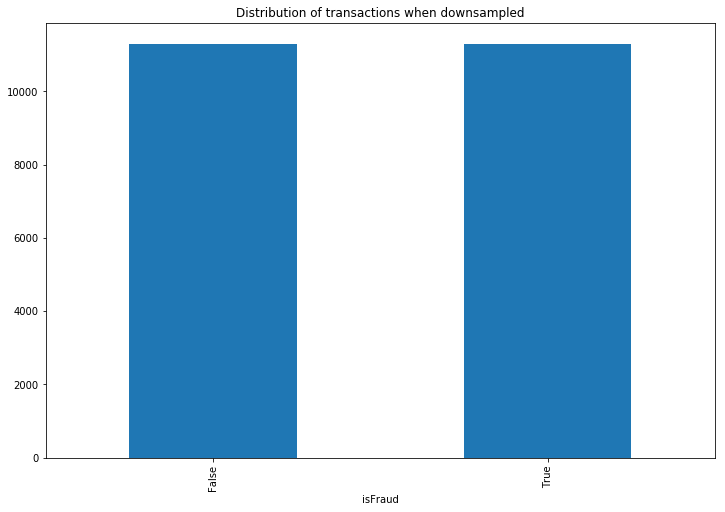

In [106]:
ax = undCount.plot(kind = 'bar',figsize=(12,8),title='Distribution of transactions when downsampled')
plt.show()

In [107]:
target=underSamp['isFraud']

In [108]:
finalDf=underSamp.drop(['isFraud'],axis=1)

In [109]:
finalDf.head(3)

,cardPresent,currentBalance,transactionAmount,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL,merchantCategoryCode_airline,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,merchantCategoryCode_fuel,merchantCategoryCode_furniture,merchantCategoryCode_gym,merchantCategoryCode_health,merchantCategoryCode_hotels,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,posEntryMode_00,posEntryMode_02,posEntryMode_05,posEntryMode_09,posEntryMode_80,posEntryMode_90,posConditionCode_01,posConditionCode_08,posConditionCode_99,day_of_trans,month_of_trans,year_of_trans,hour_of_trans,age_of_acnt,age_rem,addr_change,week_of_trans_Friday,week_of_trans_Monday,week_of_trans_Saturday,week_of_trans_Sunday,week_of_trans_Thursday,week_of_trans_Tuesday,week_of_trans_Wednesday
524780,False,1216.80,35.57,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,7,9,2016,7,1003.329826,5075.670174,39.329826,0,0,0,0,0,0,1
93902,False,550.38,201.48,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,25,3,2016,4,1047.188229,3780.811771,1047.188229,1,0,0,0,0,0,0
201296,False,71.14,71.14,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,9,11,2016,3,341.139560,3308.860440,341.139560,0,0,0,0,0,0,1


In [110]:
finalDf.shape

(22604, 48)

In [111]:

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(finalDf, target, test_size = 0.25, random_state = 42)


Splitted the dataframe in 75:25. 75% of the data is used to train the classification model and 25% is used to test the model. 

In [112]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (16953, 48)
Training Labels Shape: (16953,)
Testing Features Shape: (5651, 48)
Testing Labels Shape: (5651,)


#### Random Forest

Hyperparameters for tuning to train random forest

In [113]:
param_rf = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [114]:
rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf, param_grid=param_rf, cv=5, iid=False)
grid_search_rf.fit(train_features, train_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'max_depth': [3, None], 'max_features': [1, 3, 10], 'min_samples_split': [2, 3, 10], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Also applied cross-validation with CV=5 along with gridsearch. It will select the best hyperparameters and crossvalidate each one of them 5 times. 

In [115]:
preds=grid_search_rf.predict(test_features)

In [116]:
pd.crosstab(test_labels, preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,False,True
Actual Species,,
False,1993,855
True,914,1889


In [117]:
print('Performance of random forest with undersampling and grid search on test set\n')
print('Precision score: ',precision_score(test_labels, preds, average='macro'))
print('Recall score: ',recall_score(test_labels, preds, average='macro'))
print('Accuracy Score: ',accuracy_score(test_labels, preds))
print('F-1 Score: ',f1_score(test_labels, preds, average='macro'))

Performance of random forest with undersampling and grid search on test set

Precision score:  0.6869987970125393
Recall score:  0.6868550624932356
Accuracy Score:  0.6869580605202619
F-1 Score:  0.686851997079847


In [118]:
preds_train=grid_search_rf.predict(train_features)

In [119]:
pd.crosstab(train_labels, preds_train, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,False,True
Actual Species,,
False,5764,2690
True,2861,5638


In [120]:
print('Performance of random forest with undersampling and grid search on train set\n')
print('Precision score: ',precision_score(train_labels, preds_train, average='macro'))
print('Recall score: ',recall_score(train_labels, preds_train, average='macro'))
print('Accuracy Score: ',accuracy_score(train_labels, preds_train))
print('F-1 Score: ',f1_score(train_labels, preds_train, average='macro'))

Performance of random forest with undersampling and grid search on train set

Precision score:  0.6726415653844547
Recall score:  0.6725897949334999
Accuracy Score:  0.6725653276706187
F-1 Score:  0.6725472394176837


We can observe that random forest with undersampling is performing much better than the previous approach. Recall and precision scores are 67%. However, detecting only 2 out of 3 frauds in not good in the fraud transaction detection and we can say that RF is performing poorly with the undersampled data. It has very low test as well as train error. It has high bias and it is not catching all the patterns in the dataset.

Now lets move to another popular algorithm which is logistic regression.

#### Logistic regression

In [121]:
# The hyper parameters are selected from these
lr_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_lr = GridSearchCV(LogisticRegression(), lr_params,cv=5)

In [122]:
grid_lr.fit(train_features, train_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [123]:
preds_lr=grid_lr.predict(test_features)

In [124]:
pd.crosstab(test_labels, preds_lr, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,False,True
Actual Species,,
False,1879,969
True,790,2013


In [125]:
print('Performance of Logistic regression with undersampling and grid search on test set\n')
print('Precision score: ',precision_score(test_labels, preds_lr, average='macro'))
print('Recall score: ',recall_score(test_labels, preds_lr, average='macro'))
print('Accuracy Score: ',accuracy_score(test_labels, preds_lr))
print('F-1 Score: ',f1_score(test_labels, preds_lr, average='macro'))

Performance of Logistic regression with undersampling and grid search on test set

Precision score:  0.689529646971375
Recall score:  0.6889601755943672
Accuracy Score:  0.6887276588214475
F-1 Score:  0.6885525355822476


In [126]:
preds_train_lr=grid_lr.predict(train_features)

In [127]:
pd.crosstab(train_labels, preds_train_lr, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,False,True
Actual Species,,
False,5520,2934
True,2419,6080


In [128]:
print('Performance of logistic regression with undersampling and grid search on train set\n')
print('Precision score: ',precision_score(train_labels, preds_train_lr, average='macro'))
print('Recall score: ',recall_score(train_labels, preds_train_lr, average='macro'))
print('Accuracy Score: ',accuracy_score(train_labels, preds_train_lr))
print('F-1 Score: ',f1_score(train_labels, preds_train_lr, average='macro'))

Performance of logistic regression with undersampling and grid search on train set

Precision score:  0.6849039993853734
Recall score:  0.6841618155553055
Accuracy Score:  0.6842446764584439
F-1 Score:  0.6838997648996592


These are the results which we are getting on logistic regression. Even this algorithm is performing poorly with the undersampled data. It also has high bias.

The problem with undersampled data is, it removes more than 95% of data. Training is done on only 3% of available data. So, we might miss important patterns. Also non-fraud data is randomly selected. So the error is subject to change based on the selected data. 


### Upsampling

In this case, we synthetically create the minority class and make it equal to the majority class without removing any of the majority class examples that we did for undersampling. Advantage of this method is we are not lossing any information from the dataset and 100% of data can be used.

In [129]:
# upsample minority
fraud_upsampled = resample(frauds,
                          replace=True, # sample with replacement
                          n_samples=len(non_frauds)) # match number in majority class) 
upsamp = pd.concat([non_frauds, fraud_upsampled])

In [130]:
len(upsamp)

1261224

In [131]:
upCount=upsamp.groupby('isFraud').size()
upCount

isFraud
False    630612
True     630612
dtype: int64

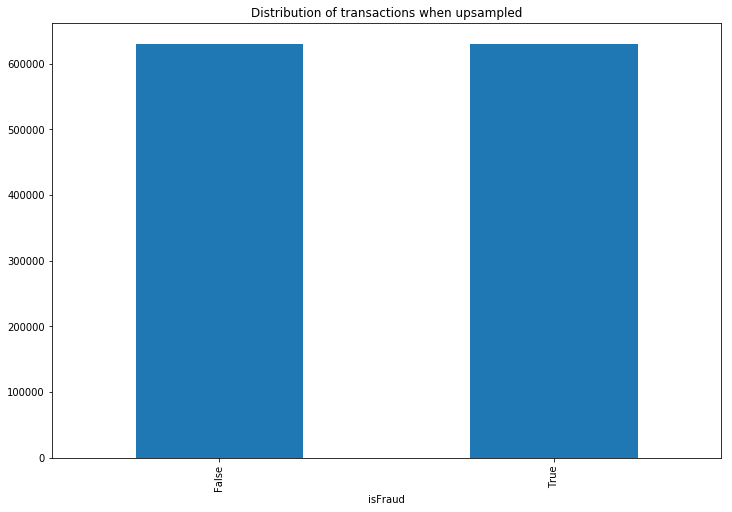

In [132]:
ax = upCount.plot(kind = 'bar',figsize=(12,8),title='Distribution of transactions when upsampled')
plt.show()

In [133]:
targetup=upsamp['isFraud']

In [134]:
finalDfup=upsamp.drop(['isFraud'],axis=1)

In [135]:
finalDfup.head(3)

,cardPresent,currentBalance,transactionAmount,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL,merchantCategoryCode_airline,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,merchantCategoryCode_fuel,merchantCategoryCode_furniture,merchantCategoryCode_gym,merchantCategoryCode_health,merchantCategoryCode_hotels,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,posEntryMode_00,posEntryMode_02,posEntryMode_05,posEntryMode_09,posEntryMode_80,posEntryMode_90,posConditionCode_01,posConditionCode_08,posConditionCode_99,day_of_trans,month_of_trans,year_of_trans,hour_of_trans,age_of_acnt,age_rem,addr_change,week_of_trans_Friday,week_of_trans_Monday,week_of_trans_Saturday,week_of_trans_Sunday,week_of_trans_Thursday,week_of_trans_Tuesday,week_of_trans_Wednesday
546662,False,0.00,62.09,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,5,11,2016,15,1051.648507,1182.351493,1051.648507,0,0,1,0,0,0,0
429281,True,1633.71,283.93,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,27,9,2016,1,369.074282,5451.925718,69.074282,0,0,0,0,0,1,0
550272,False,4100.59,23.34,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,21,7,2016,16,375.677674,3054.322326,170.677674,0,0,0,0,1,0,0


In [136]:
finalDfup.shape

(1261224, 48)

In [137]:

# Split the data into training and testing sets
trainup_features, testup_features, trainup_labels, testup_labels = train_test_split(finalDfup, targetup, test_size = 0.25, random_state = 42)

In [138]:
print('Training Features Shape:', trainup_features.shape)
print('Training Labels Shape:', trainup_labels.shape)
print('Testing Features Shape:', testup_features.shape)
print('Testing Labels Shape:', testup_labels.shape)

Training Features Shape: (945918, 48)
Training Labels Shape: (945918,)
Testing Features Shape: (315306, 48)
Testing Labels Shape: (315306,)


#### Random Forest

In [139]:
rfup=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [140]:
rfup.fit(trainup_features, trainup_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [141]:
predsup=rfup.predict(testup_features)

In [142]:
pd.crosstab(testup_labels, predsup, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,False,True
Actual Species,,
False,157790,47
True,0,157469


In [143]:
print('Performance of random forest with oversampling and grid search on test set\n')
print('Precision score: ',precision_score(testup_labels, predsup, average='macro'))
print('Recall score: ',recall_score(testup_labels, predsup, average='macro'))
print('Accuracy Score: ',accuracy_score(testup_labels, predsup))
print('F-1 Score: ',f1_score(testup_labels, predsup, average='macro'))

Performance of random forest with oversampling and grid search on test set

Precision score:  0.9998508088067244
Recall score:  0.9998511122233698
Accuracy Score:  0.9998509384534389
F-1 Score:  0.9998509382989449


In [144]:
preds_trainup=rfup.predict(trainup_features)

In [145]:
pd.crosstab(trainup_labels, preds_trainup, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,False,True
Actual Species,,
False,472775,0
True,0,473143


In [146]:
print('Performance of random forest with oversampling and grid search on train set\n')
print('Precision score: ',precision_score(trainup_labels, preds_trainup, average='macro'))
print('Recall score: ',recall_score(trainup_labels, preds_trainup, average='macro'))
print('Accuracy Score: ',accuracy_score(trainup_labels, preds_trainup))
print('F-1 Score: ',f1_score(trainup_labels, preds_trainup, average='macro'))

Performance of random forest with oversampling and grid search on train set

Precision score:  1.0
Recall score:  1.0
Accuracy Score:  1.0
F-1 Score:  1.0


We can observe here that random forest is performing very excellent on the oversampled data. For the train set out of 937K examples, only 1 is classified in the wrong class, giving more than 99.99% accuracy. Most importantly, it is not giving a single true negative. It is correctly detecting all the frauds.

With the test set also, no true negatives are predicted. Accuracy, precision and recall score percentage is more than 99.99. 

So, oversampled data works the best with random forest with hyperparameter tuning. It is detecting every fraud correctly and very negligible false positives which can be tollerated in the fraud transaction detection where detecting fraud is more important than not detecting a fraud transaction. 